# Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

C:\Users\my lappy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the dataset through excel file 

In [2]:
A=pd.read_excel("Case Study Data 1.xlsx")

In [3]:
A.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


# EDA (Exploratory Data Analysis)

# Checking how many rows and columns are there in the dataset

In [4]:
A.shape

(9938, 16)

# Chekcking datatypes of the columns 

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9938 entries, 0 to 9937
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Retailer Name         9938 non-null   object 
 1   Brand1                9938 non-null   float64
 2   Brand2                9938 non-null   float64
 3   Brand3                9938 non-null   float64
 4   Brand4                9938 non-null   float64
 5   Brand5                9938 non-null   float64
 6   Brand6                9938 non-null   float64
 7   Brand7                9938 non-null   float64
 8   Brand8                9938 non-null   float64
 9   Brand9                9938 non-null   float64
 10  Brand10               9938 non-null   float64
 11  Brand11               9938 non-null   float64
 12  Brand12               9938 non-null   float64
 13  Total Sales           9938 non-null   float64
 14  Number of Brands      9938 non-null   int64  
 15  Category of Retailer 

# Checking if there is any null values in the data

In [6]:
print(A.isnull().sum())

Retailer Name              0
Brand1                     0
Brand2                     0
Brand3                     0
Brand4                     0
Brand5                     0
Brand6                     0
Brand7                     0
Brand8                     0
Brand9                     0
Brand10                    0
Brand11                    0
Brand12                    0
Total Sales                0
Number of Brands           0
Category of Retailer    9938
dtype: int64


Since there are no null values we can move forward with this data .

# Since we have to categorize sales in only 3 categories means we have our k=3 and we can move forward by applying K-Means Algorithm

In [7]:
# Taking there two columns / variables into consideration for classification of the catogories
# Number of Brands and Total Sales --- these two columns 
X = A.values[:,[-3,-2]]
print(X)

[[30826.609999999997 1]
 [67713.16919999999 3]
 [65006.405399999996 3]
 ...
 [0.0 0]
 [48324.57399999999 2]
 [0.0 0]]


In [8]:
X_new=X[:,1]# in the row form
X_new=np.reshape(X_new,(-1,1))#reshaping because wanting to convert rows to variable on which the model can be built
print(X_new)

[[1]
 [3]
 [3]
 ...
 [0]
 [2]
 [0]]


# Applying K-Means algo

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=10)
Y_pred = kmeans.fit_predict(X_new)

In [10]:
Y_pred

array([0, 2, 2, ..., 0, 2, 0])

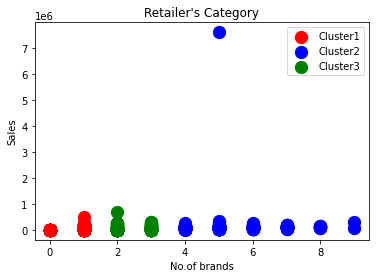

In [11]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(20, 5))
plt.scatter(X[Y_pred == 0, 1], X[Y_pred == 0, 0], s = 150, c = "red", label = "Cluster1")
plt.scatter(X[Y_pred == 1, 1], X[Y_pred == 1, 0], s = 150, c = "blue", label = "Cluster2")
plt.scatter(X[Y_pred == 2, 1], X[Y_pred == 2, 0], s = 150, c = "green", label = "Cluster3")
plt.title("Retailer's Category")
plt.ylabel("Sales")
plt.xlabel("No.of brands")
plt.legend()
plt.show()

# Renaming Clusters

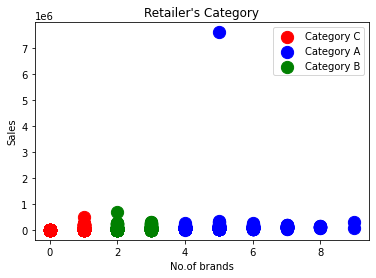

In [12]:
plt.scatter(X[Y_pred == 0, 1], X[Y_pred == 0, 0], s = 150, c = "red", label = "Category C")
plt.scatter(X[Y_pred == 1, 1], X[Y_pred == 1, 0], s = 150, c = "blue", label = "Category A")
plt.scatter(X[Y_pred == 2, 1], X[Y_pred == 2, 0], s = 150, c = "green", label = "Category B")
plt.title("Retailer's Category")
plt.ylabel("Sales")
plt.xlabel("No.of brands")
plt.legend()
plt.show()

# Mapping data into original dataset

In [13]:
A["Retailer's Category"]=Y_pred
A["Retailer's Category"]=A["Retailer's Category"].map({0:"Category C",1:"Category A",2:"Category B"})
A.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer,Retailer's Category
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN,Category C
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN,Category B
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN,Category B
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN,Category C
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN,Category C


# Creating excel with updated dataset

In [14]:
A.to_excel("Retailer Classification.xlsx")

# Calculating the values of categories

In [15]:
A["Retailer's Category"].value_counts()

Category C    7902
Category B    1294
Category A     742
Name: Retailer's Category, dtype: int64

In [16]:
"""
import xlsxwriter

import pandas as pd

from pandas import DataFrame

path = ('...\\filename.xlsx')

xl = pd.ExcelFile(path)

print(xl.sheet_names)
"""

"\nimport xlsxwriter\n\nimport pandas as pd\n\nfrom pandas import DataFrame\n\npath = ('...\\filename.xlsx')\n\nxl = pd.ExcelFile(path)\n\nprint(xl.sheet_names)\n"

# Reading updated excel file 

In [17]:
B=pd.read_excel("Retailer Classification.xlsx")

In [18]:
B.head(50)

,Unnamed: 0,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer,Retailer's Category
0,0,Retailer 1,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,30826.6100,0.0000,0.0000,30826.6100,1,NaN,Category C
1,1,Retailer 2,9833.1060,0.0000,0.0,24073.632,33806.4312,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,67713.1692,3,NaN,Category B
2,2,Retailer 3,24690.6708,0.0000,0.0,0.000,27367.0386,0.0000,0.0000,0.0000,12948.696,0.0000,0.0000,0.0000,65006.4054,3,NaN,Category B
3,3,Retailer 4,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0,NaN,Category C
4,4,Retailer 5,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0,NaN,Category C
5,5,Retailer 6,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0,NaN,Category C
6,6,Retailer 7,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,25897.392,0.0000,0.0000,0.0000,25897.3920,1,NaN,Category C
7,7,Retailer 8,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0,NaN,Category C
8,8,Retailer 9,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0,NaN,Category C
9,9,Retailer 10,0.0000,0.0000,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.000,31309.9064,0.0000,0.0000,31309.9064,1,NaN,Category C
